In [1]:
import math
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

from keras.utils import to_categorical

Using TensorFlow backend.


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization


In [6]:
path1 = "fashion-mnist_train.csv"
data_train = pd.read_csv(path1)


In [7]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X_data = np.array(data_train.iloc[:, 1:])
y_data= to_categorical(np.array(data_train.iloc[:, 0]))

a=int(X_data.shape[0]*0.8)
X_train=X_data[0:a,]
y_train=y_data[0:a,]
X_val=X_data[a:X_data.shape[0],]
y_val=y_data[a:y_data.shape[0],]


In [8]:
path2="fashion-mnist_test.csv"
data_test=pd.read_csv(path2)

In [9]:

X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val= X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val=X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val/=255


<Figure size 720x720 with 0 Axes>

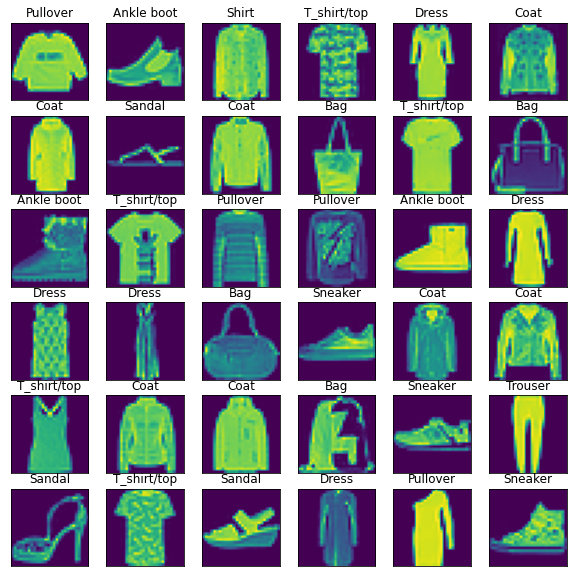

In [10]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))

b=np.array(data_train.iloc[:, 0])
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_data[i].reshape((28,28)))
    label_index = int(b[i])
    plt.title(class_names[label_index])
plt.show()


In [11]:
batch_size = 256
num_classes = 10
epochs = 50

img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

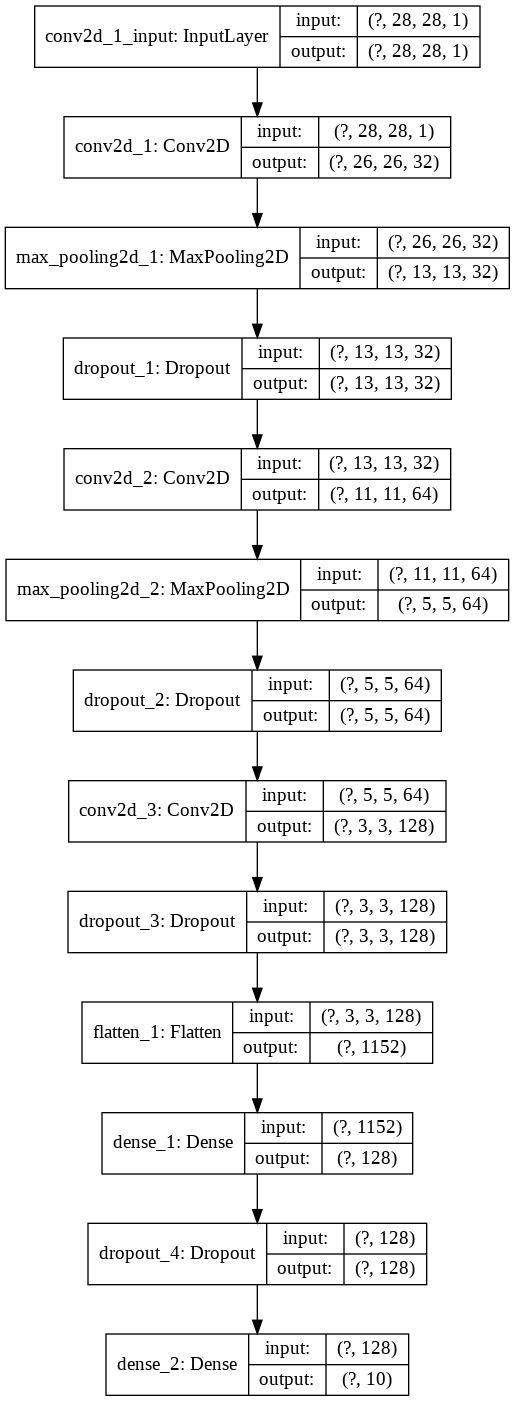

In [13]:
import keras.utils
tf.keras.utils.plot_model(model, show_shapes=True)

In [14]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 46s 954us/step - loss: 0.8699 - accuracy: 0.6703 - val_loss: 0.5377 - val_accuracy: 0.7962
Epoch 2/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.5490 - accuracy: 0.7901 - val_loss: 0.4480 - val_accuracy: 0.8383
Epoch 3/50
48000/48000 [==============================] - 45s 945us/step - loss: 0.4795 - accuracy: 0.8192 - val_loss: 0.4124 - val_accuracy: 0.8495
Epoch 4/50
48000/48000 [==============================] - 45s 945us/step - loss: 0.4380 - accuracy: 0.8368 - val_loss: 0.3660 - val_accuracy: 0.8668
Epoch 5/50
48000/48000 [==============================] - 45s 947us/step - loss: 0.3987 - accuracy: 0.8520 - val_loss: 0.3395 - val_accuracy: 0.8761
Epoch 6/50
48000/48000 [==============================] - 45s 945us/step - loss: 0.3761 - accuracy: 0.8607 - val_loss: 0.3157 - val_accuracy: 0.8838
Epoch 7/50
48000/48000 [==============================] - 

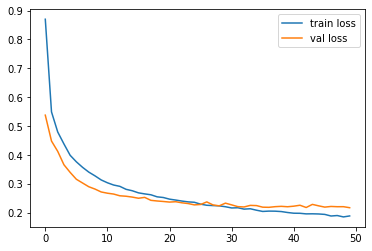

In [15]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test data loss:', score[0])
print('Test data accuracy:', score[1])

Test data loss: 0.19715597574412821
Test data accuracy: 0.9291999936103821


In [18]:
predicted_classes = model.predict_classes(X_test)
y_true = np.array(data_test.iloc[:, 0])

correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

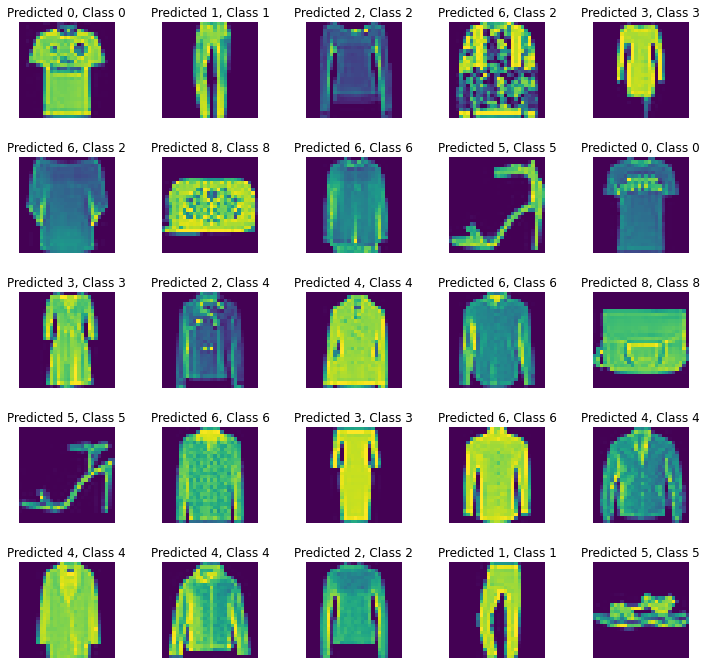

In [25]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predicted {}, Class {}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)